<h1> generate Nph,Ne and S1,S2 from and Energy array. for LZ </h1>

In [1]:
from LZlim_pyNEST import *
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h3> run the code with a differential energy spectrum as the input. <br/>setup: title to save figure and file path to diff E spectrum , or list of energies </h3>

<h4> Options are file_path=
<ol>
<li>'data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt'</li>
<li>'data/B8_DiffRate.txt'</li>
<li>'data/B8_Peter.txt'</li>
<li>'data/ATM_DiffRate.txt'</li>
<li>'data/atm_Peter.txt'</li>
<li>'data/HEP_DiffRate.txt'</li>
<li>'data/hep_Peter.txt'</li>
<li>'data/DSN_DiffRate.txt'</li>
<li>'data/CoherentNuSUM_DiffRate.txt'</li>
<li>'data/dru_er_cryoti_fidvol.txt' </li>
<li>'data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt'</li>
</ol>
</h4>

total between 1.00 and 200.00 keV = 3.45084e-05 [evts/kg/day]
LZ exposure factor = 5174.73


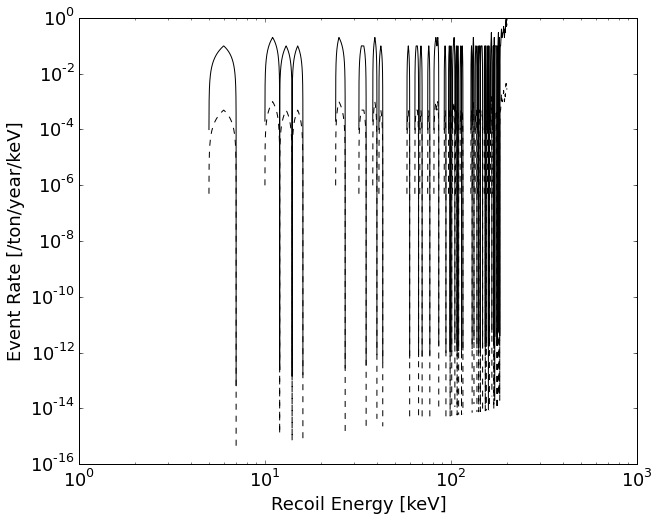

In [7]:
#setup (title to save figure, and file path to diff E spectrum , or list of energies)
title="PP" 
file_path='data/PP_7Be_evt_ton_year_keV_lin_noDiscrim.txt' 
ParticleType='ER' # ER or NR

# Get S1 and S2 from an exmple PP solar neutrino differential spectrum
Nph, Ne, Ne_ext, S1_spike, S1, S2, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=1e6, minSpikePE=0.2, e_lifetime=1000)

# Or use this to convert energy array into S1,S2 with energy_array=>your energy array
#Nph, Ne, S1, S2 = E2NphNe(Energy =energy_array, ParticleType=ParticleType)

#Generate Flat ER and NR spectra:
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, E_bin_cen_e, Eff_e, E_bin_cen_r, Eff_r = genBands(nSim=1e6)

<h2> Make scatter plot in S2/S1 vs. S1 and calculate expected number of LZ WIMP like events</h2>

Total Simulated= 1e+06 
Nominal LZ exposoure factor 5174.7 
Number below NR mean in WS region= 0 +/- 0
Number above NR mean in WS region= 5716 +/- 76
LZ nominal exposure BG in S1 region= 1.105 +/- 0.015
LZ nominal exposure BG in WS region= 0.000 +/- 0.000


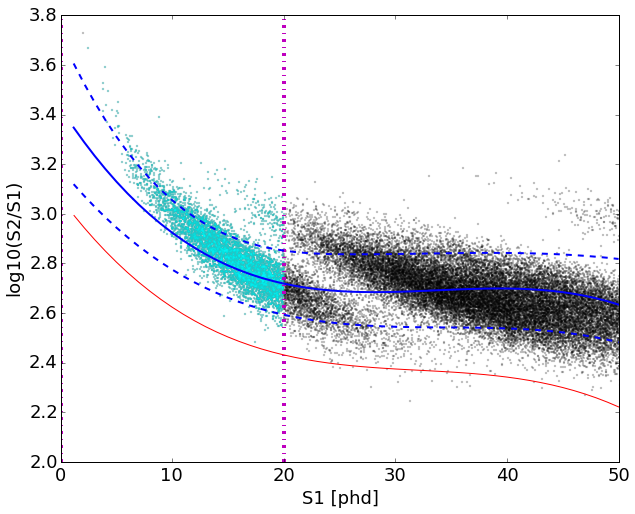

In [8]:
#plot WS region, and Calc expected count in WS region

#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=0
S1_max=20
Ne_min=5
NS1_coin_req=3
WS_cut=(inrange(S1,[S1_min,S1_max])) & (Ne_ext>=Ne_min) & (NS1_coin>=NS1_coin_req)

plt.scatter(S1,log10(S2/S1),color='black',s=2,alpha=0.2)
plt.scatter(S1[WS_cut],log10(S2[WS_cut]/S1[WS_cut]),color='cyan',s=2,alpha=0.2)
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})
plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)

#plot NR mean, with a smooth spline, and calculate number of WS candidates
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n, s=1)
WS_under_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])<=sNR(S1[WS_cut])) ) 
WS_above_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])>sNR(S1[WS_cut])) )

plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r')

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e, s=1)
s_ub = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e+1.28*stdev_S2oS1_e, s=.1) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e-1.28*stdev_S2oS1_e, s=.1)
plot(S1_bin_cen_e,s(S1_bin_cen_e),'-b',linewidth=2)
plot(S1_bin_cen_e,s_ub(S1_bin_cen_e),'--b',linewidth=2)
plot(S1_bin_cen_e,s_lb(S1_bin_cen_e),'--b',linewidth=2)


xlim([0,50])
ylim([2.0,3.8])
savefig('figs/'+title+'.pdf')
savefig('figs/'+title+'.png')


print('Total Simulated= {:.1g} '.format(size(S1)))
print('Nominal LZ exposoure factor {:.1f} '.format(LZ_exposure_factor))
print('Number below NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_under_NRmean, sqrt(WS_under_NRmean)))
print('Number above NR mean in WS region= {:.0f} +/- {:.0f}'.format(WS_above_NRmean, sqrt(WS_above_NRmean)))
print('LZ nominal exposure BG in S1 region= {:.3f} +/- {:.3f}'.format((WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor, sqrt(WS_above_NRmean+WS_under_NRmean)/LZ_exposure_factor))
print('LZ nominal exposure BG in WS region= {:.3f} +/- {:.3f}'.format(WS_under_NRmean/LZ_exposure_factor, sqrt(WS_under_NRmean)/LZ_exposure_factor))

<h1> Plot Efficiency for ER and NR </h1>

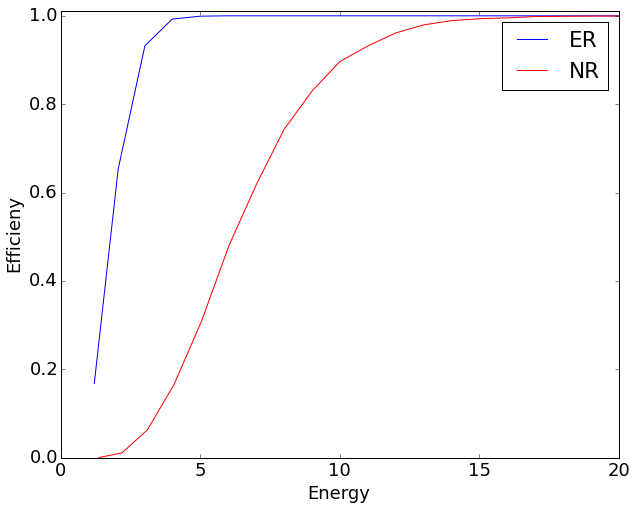

In [23]:
figure()
plot(E_bin_cen_e, Eff_e,'b')
plot(E_bin_cen_r, Eff_r,'r')
legend(['ER','NR'])
ylim([0,1.01])
xlim([0, 20])
xlabel('Energy')
ylabel('Efficieny')
savetxt('data/Eff.txt',np.vstack([E_bin_cen_e, Eff_e,E_bin_cen_r, Eff_r]).T)

In [ ]:
#make a denisty scatter plot
scatterColor(S1,log10(S2/S1))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})

In [34]:
#In case you need to load in the text file and change the units of the differential rate

#Edatatxt, rate=np.loadtxt('data/hep_Peter.txt',skiprows=0,unpack=True)
#rate=rate*1000*365
#np.savetxt('data/hep_Peter.txt',np.vstack([Edatatxt, rate]).T)

<h1> overlay diff spectrum </h1>

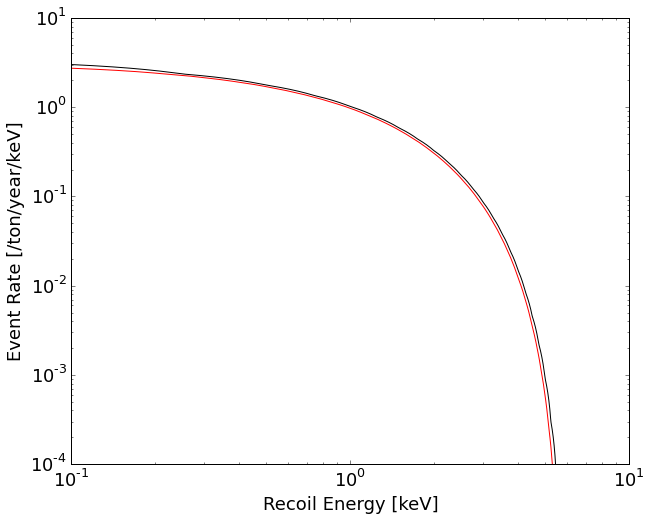

In [44]:
#file_path_1='data/B8_DiffRate.txt' 
#file_path_2='data/B8_Peter_lowE.txt'

#file_path_1='data/ATM_DiffRate.txt' 
#file_path_2='data/atm_Peter.txt'

file_path_1='data/HEP_DiffRate.txt' 
file_path_2='data/hep_Peter.txt'

Edatatxt_1, rate_1=np.loadtxt(file_path_1,skiprows=0,unpack=True) #evts/ton/year #Energy scale must be linear in text file for code to work properly!
Edata_1=np.arange(min(Edatatxt_1),max(Edatatxt_1),0.001)#0.01 keV binning
dR_1=np.interp(Edata_1,Edatatxt_1,rate_1)

Edatatxt_2, rate_2=np.loadtxt(file_path_2,skiprows=0,unpack=True) #evts/ton/year #Energy scale must be linear in text file for code to work properly!
Edata_2=np.arange(min(Edatatxt_2),max(Edatatxt_2),0.001)#0.01 keV binning
dR_2=np.interp(Edata_2,Edatatxt_2,rate_2)

plt.figure()
plt.loglog(Edata_1,dR_1,'-k')
plt.hold('on')
plt.loglog(Edata_2,dR_2,'-r')  
ylim([1e-4, 1e1])
xlim([.1, 1e1])
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Event Rate [/ton/year/keV]')
#text(1,0.013,'PP+7Be',fontsize=16)
plt.rcParams.update({'font.size': 18})